In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv('data/employee_retention.csv')
df = df.drop(columns=['idx'])

In [21]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,join_year,quit_year,days_employed,quit
0,1001444,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,2008,2008.0,90,1
1,388804,8,design,21,191000.0,2011-05-17,2012-03-16,2011,2012.0,304,1
2,407990,3,design,9,90000.0,2012-03-26,2015-04-10,2012,2015.0,1110,1
3,120657,2,engineer,20,298000.0,2013-04-08,2015-01-30,2013,2015.0,662,1
4,1006393,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,2008,2008.0,90,1


In [5]:
# convert dates to datetime object
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [7]:
# function to compute number of days an employee is employed . 
#If an employee has not quit then Jan 01, 2016 (last date in the dataset) is considered to be the  current date.
def get_employed(row):
    date_time_str = 'Jan 01 2016'
    date_time_obj = dt.datetime.strptime(date_time_str, '%b %d %Y')
    if math.isnan(row['quit_year']):
        return (date_time_obj- row['join_date']).days
    else:
        return (row['quit_date']- row['join_date']).days

In [8]:
# create new features join_year and quit_year, dayes employed and quit (0 for still employed and 1 for quit)
df['join_year'] = df['join_date'].dt.year
df['quit_year'] = df['quit_date'].dt.year

df['days_employed']=df.apply(lambda row: get_employed(row),axis=1) 

df['quit'] = ~df['quit_date'].isnull()*1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34702 entries, 0 to 34701
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   employee_id    34702 non-null  int64         
 1   company_id     34702 non-null  int64         
 2   dept           34702 non-null  object        
 3   seniority      34702 non-null  int64         
 4   salary         34463 non-null  float64       
 5   join_date      34702 non-null  datetime64[ns]
 6   quit_date      23510 non-null  datetime64[ns]
 7   join_year      34702 non-null  int64         
 8   quit_year      23510 non-null  float64       
 9   days_employed  34702 non-null  int64         
 10  quit           34702 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(5), object(1)
memory usage: 2.8+ MB


In [14]:
df['quit'].unique()

array([1, 0], dtype=int32)

In [15]:
print('Till date %f employees quit' %(df['quit'].mean()))

Till date 0.677483 employees quit


In [18]:
# Helper function to plot stacked bar plot
def plot_stacked_bar_plot(x,y1,y2,width,label1, label2, xlabel, ylabel):
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y1, width, label=label1)
    rects2 = ax.bar(x + width/2, y2, width, label=label2)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.legend()

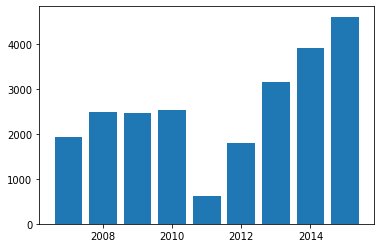

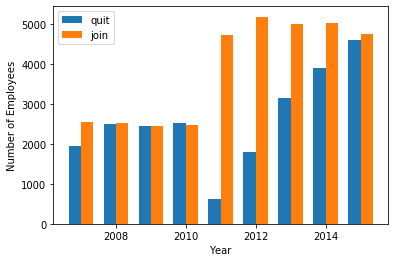

In [19]:
# plot number of employees who quit or join every year
df_group_quit_year = df.groupby('quit_year').count()
df_group_quit_year = df_group_quit_year.reset_index()

df_group_join_year = df.groupby('join_year').count()
df_group_join_year = df_group_join_year.reset_index()

x = df_group_quit_year['quit_year']
width = 0.35
plot_stacked_bar_plot(x,df_group_quit_year['quit'].values, 
                      df_group_join_year['join_date'].values, width,
                      'quit','join','Year','Number of Employees')

In [ ]:
company_ids = df['company_id'].unique()
df_by_company = {}
for id in company_ids:
    df_by_company[id] = df[df['company_id']==id]